In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
import collections
import numpy as np
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import NMF
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem.porter import PorterStemmer
from sklearn.decomposition import PCA
import spacy
nlp = spacy.load('en_core_web_sm')
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from gensim import corpora, models, matutils
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn import tree
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/matthew.redmond@usfoods.com/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
df = pd.read_csv("Onion_NYT.csv")
df['Title'] = df['Title'].astype(str)
df['Content'] = df['Content'].astype(str)
df['spacy_Title'] = list(nlp.pipe(df['Title']))
df['spacy_Content'] = list(nlp.pipe(df['Content']))
spstopwords = nlp.Defaults.stop_words
#https://stackoverflow.com/questions/55817040/removing-stop-words-using-spacy
df['Spacy_Title2'] = df.Title.apply(lambda text: 
                                          " ".join(token.lemma_ for token in nlp(text) 
                                                   if not token.is_stop))
df['Spacy_Content2'] = df.Content.apply(lambda text: 
                                          " ".join(token.lemma_ for token in nlp(text) 
                                                   if not token.is_stop))
titlelistforcv = []
for doc in df.Spacy_Title2:
    titlelistforcv.append(doc)
contentlistforcv = []
for doc in df.Spacy_Content2:
    contentlistforcv.append(doc)

In [3]:
cv = CountVectorizer()
X = cv.fit_transform(titlelistforcv)
df2 = pd.DataFrame(X.toarray(),columns=cv.get_feature_names())
df2.columns

Index(['000', '00000000001', '00003', '000th', '004', '06', '08', '081', '10',
       '100',
       ...
       'zwirner', 'álvarez', 'élysées', 'émigré', 'éric', 'état', 'étoile',
       'óscar', 'özil', 'ünited'],
      dtype='object', length=26036)

In [4]:
cv = CountVectorizer()
X2 = cv.fit_transform(contentlistforcv)
df_cont = pd.DataFrame(X2.toarray(),columns=cv.get_feature_names())
df_cont.columns

Index(['00', '000', '0000', '00000000001', '0000000001', '00000029', '000001',
       '000002', '000017935', '00003',
       ...
       'ÿ2', '作者价值', '奈苗', '平台价值', '東京', '用户价值', '美苗', '长期', '閱讀繁體中文版',
       '阅读简体中文版'],
      dtype='object', length=57529)

In [5]:
lsa = TruncatedSVD(2)
lsa.fit(X)

TruncatedSVD()

In [6]:
lsa2 = TruncatedSVD(2)
lsa2.fit(X2)

TruncatedSVD()

In [7]:
lsa.transform(X)

array([[ 0.01452225,  0.03131694],
       [ 0.02236886,  0.06428629],
       [ 0.01339975,  0.02132298],
       ...,
       [ 0.93183062, -0.1329276 ],
       [ 0.95231696, -0.09501112],
       [ 0.01221804,  0.02991928]])

In [9]:
lsa2.transform(X2)

array([[ 0.17263469, -0.04984574],
       [ 0.13924967,  0.00630123],
       [ 0.07115075,  0.00804832],
       ...,
       [ 0.46149133,  0.88098544],
       [ 2.03497335,  1.29079193],
       [ 1.70492881, -0.57977651]])

In [10]:
lsa_title_data = lsa.transform(X)
lsa_content_data = lsa2.transform(X2)
lsa_title_data = lsa_title_data.tolist()
lsa_content_data = lsa_content_data.tolist()

In [11]:
df_title_2 = pd.DataFrame(lsa_title_data, columns = ['feat1','feat2',])
df_content_2 = pd.DataFrame(lsa_content_data, columns = ['feat1','feat2',])

In [13]:
df4 = pd.merge(df, df_title_2, left_index=True, right_index=True)
df5 = pd.merge(df, df_content_2, left_index=True, right_index=True)

In [14]:
X = df4.iloc[:,8:10]
y = df4["Onion"]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=42)

In [16]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
result = rf_model.predict(X_test)

In [17]:
#Title LSA Random Forest
print(accuracy_score(y_test,result))
print(precision_score(y_test,result))
print(recall_score(y_test,result))
print(f1_score(y_test,result))

0.8182445645922006
0.2882205513784461
0.0815024805102764
0.1270718232044199


<AxesSubplot:>

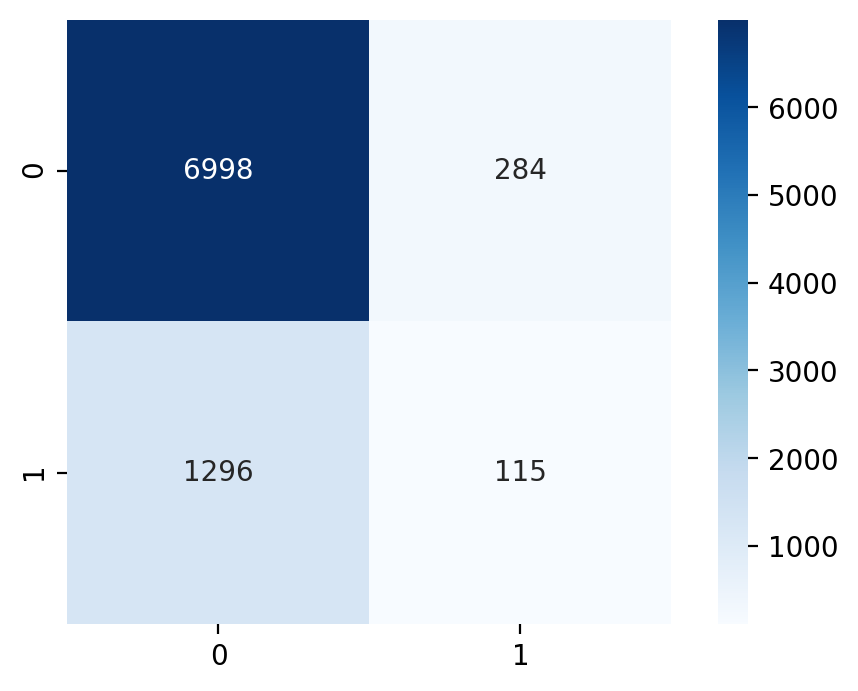

In [18]:
tc = confusion_matrix(y_test,result)
plt.figure(dpi=200)
sns.heatmap(tc, cmap=plt.cm.Blues, annot=True, square=True, fmt="d")

In [19]:
#boost (vanilla)
bc_model = xgb.XGBClassifier()
bc_model.fit(X_train, y_train)
result = bc_model.predict(X_test)

In [20]:
#Title LSA Boost
print(accuracy_score(y_test,result))
print(precision_score(y_test,result))
print(recall_score(y_test,result))
print(f1_score(y_test,result))

0.8378005291613942
0.5061728395061729
0.029057406094968107
0.054959785522788206


<AxesSubplot:>

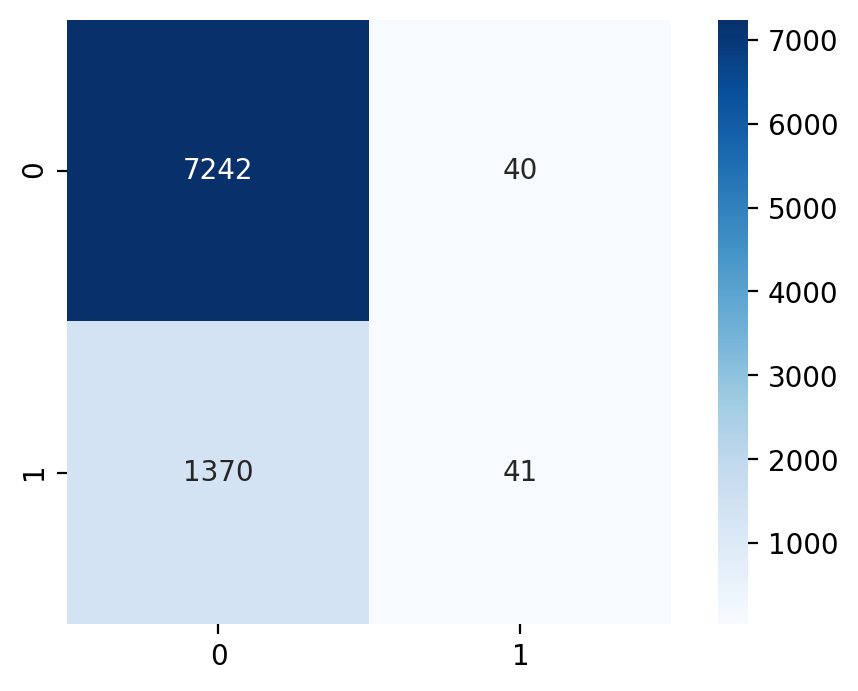

In [21]:
tc = confusion_matrix(y_test,result)
plt.figure(dpi=200)
sns.heatmap(tc, cmap=plt.cm.Blues, annot=True, square=True, fmt="d")

In [35]:
X = df5.iloc[:,8:10]
y = df5["Onion"]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=42)

In [24]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
result = rf_model.predict(X_test)
#Content LSA Random Forest
print(accuracy_score(y_test,result))
print(precision_score(y_test,result))
print(recall_score(y_test,result))
print(f1_score(y_test,result))

0.9656045093753595
0.9070278184480234
0.8781006378454996
0.8923298523586605


<AxesSubplot:>

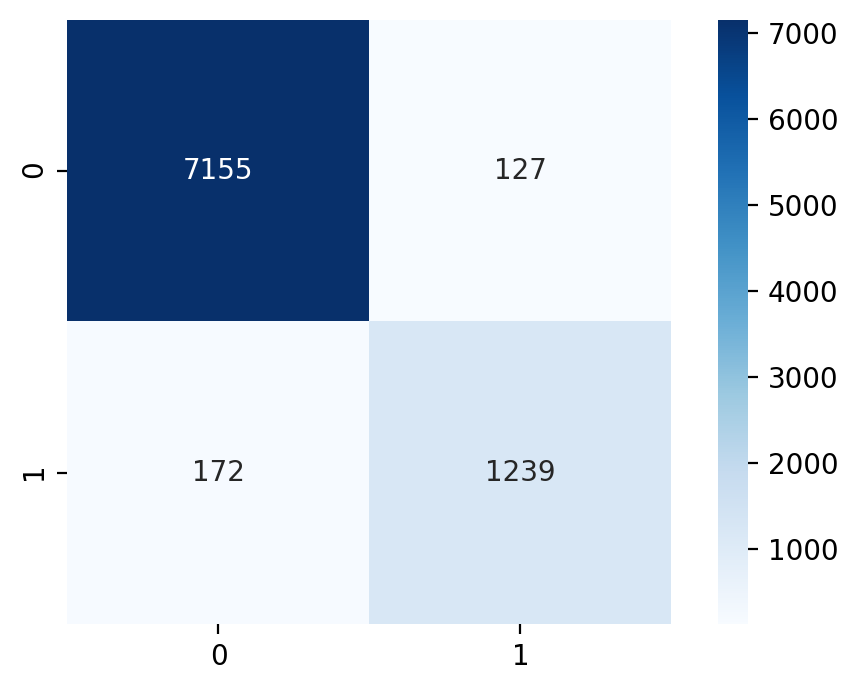

In [25]:
tc = confusion_matrix(y_test,result)
plt.figure(dpi=200)
sns.heatmap(tc, cmap=plt.cm.Blues, annot=True, square=True, fmt="d")

In [26]:
#boost (vanilla)
bc_model = xgb.XGBClassifier()
bc_model.fit(X_train, y_train)
result = bc_model.predict(X_test)
#Content LSA Boost
print(accuracy_score(y_test,result))
print(precision_score(y_test,result))
print(recall_score(y_test,result))
print(f1_score(y_test,result))

0.9687104566892902
0.9178283198826119
0.8866052445074415
0.9019466474405192


<AxesSubplot:>

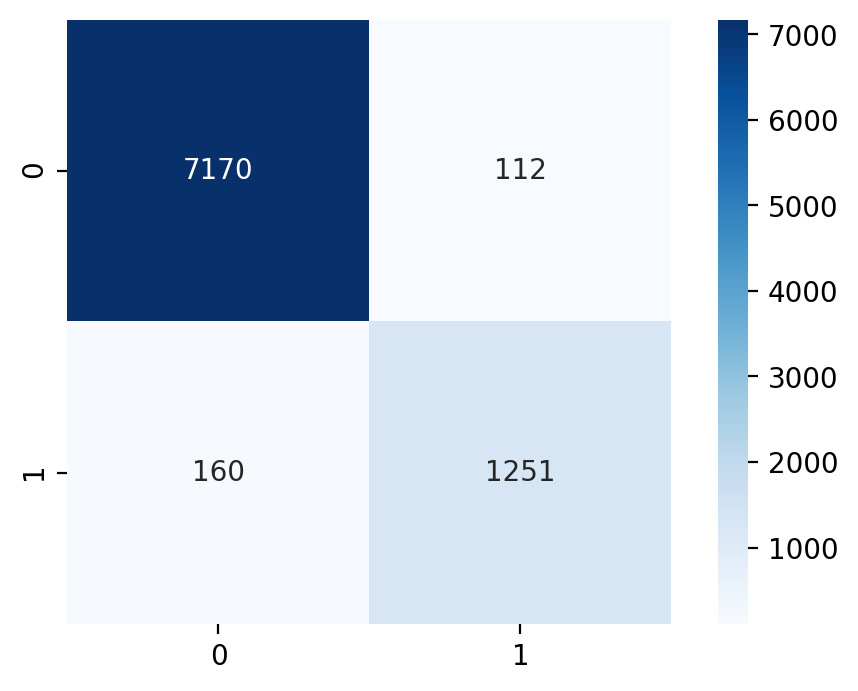

In [27]:
tc = confusion_matrix(y_test,result)
plt.figure(dpi=200)
sns.heatmap(tc, cmap=plt.cm.Blues, annot=True, square=True, fmt="d")

In [28]:
print(X)

          feat1     feat2
0      0.172635 -0.049846
1      0.139250  0.006301
2      0.071151  0.008048
3      0.576504  1.190782
4      0.010072 -0.000790
...         ...       ...
43456  0.159457  0.015751
43457  0.161633 -0.016065
43458  0.461491  0.880985
43459  2.034973  1.290792
43460  1.704929 -0.579777

[43461 rows x 2 columns]


In [31]:
X = StandardScaler(X)

/Users/matthew.redmond@usfoods.com/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass copy=          feat1     feat2
0      0.172635 -0.049846
1      0.139250  0.006301
2      0.071151  0.008048
3      0.576504  1.190782
4      0.010072 -0.000790
...         ...       ...
43456  0.159457  0.015751
43457  0.161633 -0.016065
43458  0.461491  0.880985
43459  2.034973  1.290792
43460  1.704929 -0.579777

[43461 rows x 2 columns] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [32]:
print(X)

StandardScaler(copy=          feat1     feat2
0      0.172635 -0.049846
1      0.139250  0.006301
2      0.071151  0.008048
3      0.576504  1.190782
4      0.010072 -0.000790
...         ...       ...
43456  0.159457  0.015751
43457  0.161633 -0.016065
43458  0.461491  0.880985
43459  2.034973  1.290792
43460  1.704929 -0.579777

[43461 rows x 2 columns])


In [39]:
num_clusters = 2
km = KMeans(n_clusters = num_clusters, random_state=10, n_init=10)
km.fit(X)

KMeans(n_clusters=2, random_state=10)

In [40]:

result = km.predict(X_test)
#Content LSA Boost
print(accuracy_score(y_test,result))
print(precision_score(y_test,result))
print(recall_score(y_test,result))
print(f1_score(y_test,result))

0.9689405268606925
0.9405405405405406
0.8632175761871014
0.9002217294900222


<AxesSubplot:>

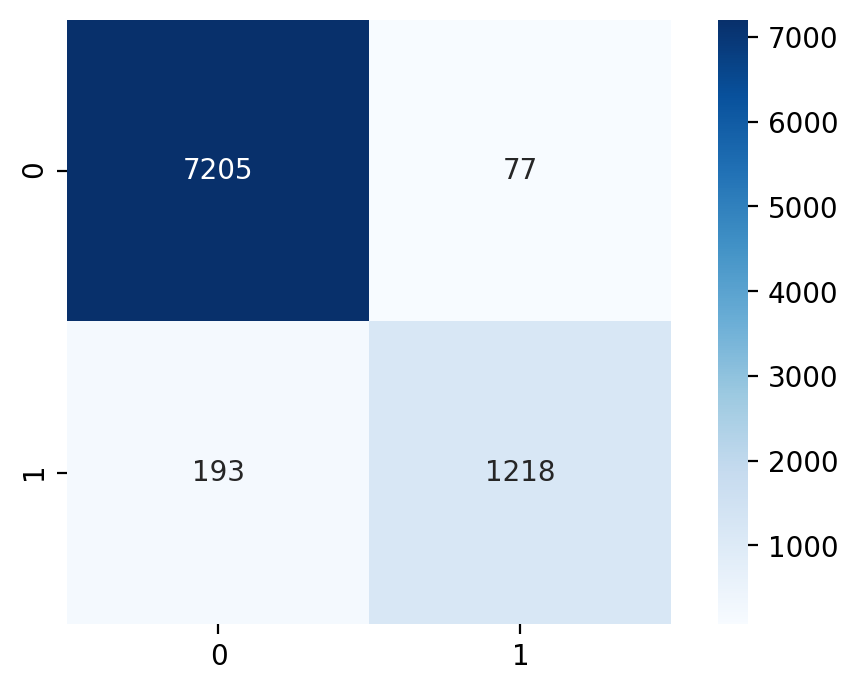

In [41]:
tc = confusion_matrix(y_test,result)
plt.figure(dpi=200)
sns.heatmap(tc, cmap=plt.cm.Blues, annot=True, square=True, fmt="d")